### Importing The Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

### Importing Dataset

In [3]:
#print first 5 rows of dataset
boston_df=pd.read_csv('BostonHousing.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#checking number of rows and columns in dataset
boston_df.shape

(506, 14)

In [5]:
#checking if any missing values
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
# fill the missing values
boston_df.fillna(boston_df.mean(),inplace=True)

In [7]:
# statistical measures of a data
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Understanding the correlation between various features in the dataset

In [8]:
correlation = boston_df.corr()

<Axes: >

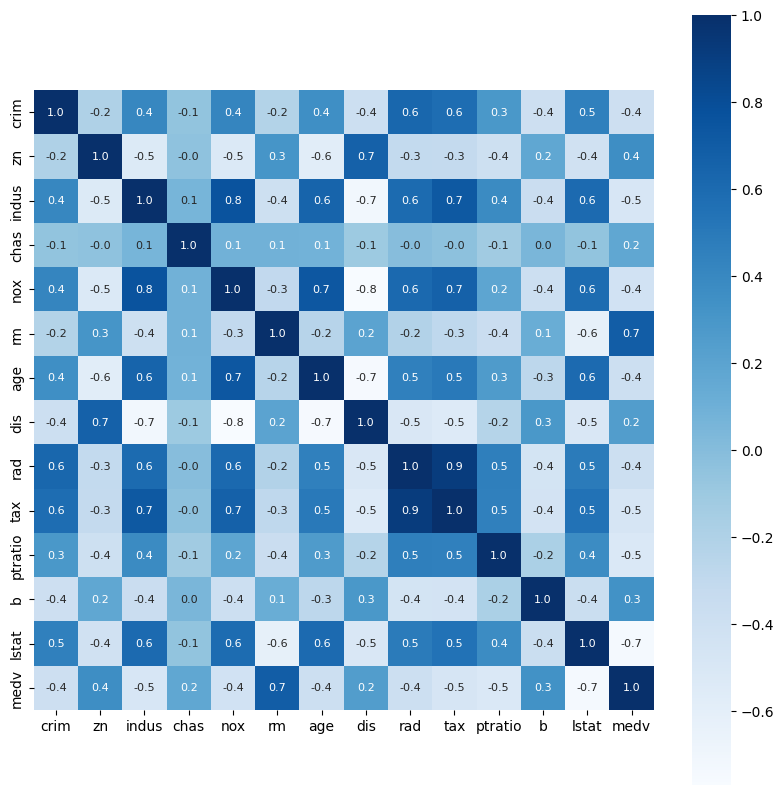

In [9]:
#constructing a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

## Splitting the Data

In [10]:
x=boston_df.drop(columns='medv',axis=1)
y=boston_df['medv']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
x , y

(        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
 0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
 1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
 2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
 3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
 4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
 501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
 502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
 503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
 504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
 505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   
 
      ptratio       b  lstat  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       17.8  39

In [12]:
x.shape,x_train.shape,x_test.shape

((506, 13), (404, 13), (102, 13))

## Model Training

In [13]:
xgbmodel=XGBRegressor()
xgbmodel.fit(x_train,y_train)
# xgbmodel.transform(x_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

#### Evaluation

In [14]:
# prediction on training data
x_train_pred=xgbmodel.predict(x_train)
x_train_pred

array([25.28244  , 23.306145 ,  7.179912 , 21.195095 , 11.70586  ,
       27.0039   , 29.611904 , 26.494379 , 43.518894 , 23.601805 ,
       11.002486 , 33.3938   , 36.008175 , 36.392673 , 19.012018 ,
       20.19201  , 34.902943 , 49.998688 , 19.292995 , 14.881165 ,
       26.61282  , 19.890856 , 24.7991   , 21.193398 , 23.90881  ,
       20.588768 , 23.093164 , 27.984821 , 19.99449  , 23.093115 ,
       25.010435 ,  9.70504  , 23.891224 , 36.09001  , 13.401134 ,
       12.721125 , 39.802616 , 10.401474 , 20.601774 , 17.772848 ,
       19.490688 , 23.698252 , 28.504183 , 24.2886   , 23.802397 ,
       19.074095 , 28.38872  , 20.4889   , 33.8107   , 14.495163 ,
       20.383757 , 16.003471 , 13.296642 , 30.776917 , 27.506376 ,
       24.405052 , 24.397108 , 25.088717 , 43.79922  , 21.901617 ,
       26.203201 , 14.2119665, 20.791231 , 20.102919 , 23.096828 ,
       13.083931 , 16.1833   , 24.812899 , 20.206757 , 22.458582 ,
       14.809266 , 28.687536 , 20.094942 , 23.403255 , 31.9941

In [15]:
# r2 score , mean absolute error
r2_train=r2_score(y_train,x_train_pred)
mse_train=mean_squared_error(y_train,x_train_pred)
print(f'The r2_score on Train data is {r2_train}\nThe mean absolute score on Train data is {mse_train}')

The r2_score on Train data is 0.9999976945023941
The mean absolute score on Train data is 0.0001862412895238022


### Visualizing the Actual values vs Predicted values for Train data

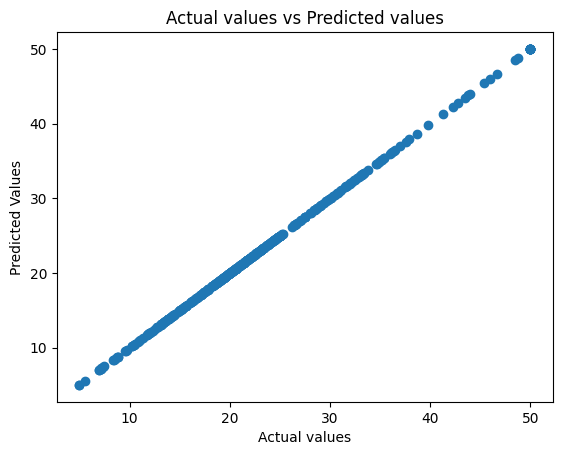

In [16]:
plt.scatter(y_train,x_train_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual values vs Predicted values')
plt.show()

In [17]:
# prediction on test data
x_test_pred=xgbmodel.predict(x_test)
r2_test=r2_score(y_test,x_test_pred)
mse_test=mean_squared_error(y_test,x_test_pred)
print(f'The r2_score on Test data is {r2_test}\nThe mean absolute score on Tets data is {mse_test}')

The r2_score on Test data is 0.9028006761760266
The mean absolute score on Tets data is 9.605955431343846


### Visualizing the Actual values vs Predicted values for Test data

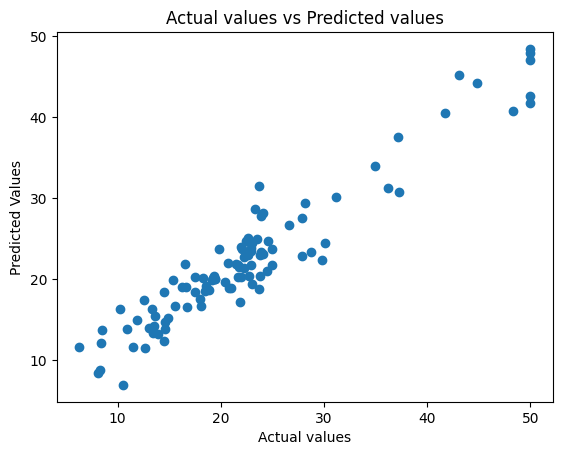

In [18]:
plt.scatter(y_test,x_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual values vs Predicted values')
plt.show()